In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from google.colab import files
uploaded = files.upload()

Saving sales_dataset.csv to sales_dataset.csv


# **Data Cleaning**

In [ ]:
#opening the dataset and checking it

import io
df = pd.read_csv(io.BytesIO(uploaded['sales_dataset.csv']))
df.head()

<ipython-input-3-de5e5d0e1214>:4: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.BytesIO(uploaded['sales_dataset.csv']))


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
#Checking rows and columns

df.shape

(128949, 23)

In [ ]:
#chceking data types and null values in columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

In [ ]:
#column 22 is not of use so removing the column

df.drop(columns = ['Unnamed: 22'], inplace=True)

In [ ]:
#removing all duplicates values in the dataset

df.drop_duplicates(inplace=True)

In [ ]:
# Changing data types of columns as per need like date to datetime etc

df['Date'] = pd.to_datetime(df['Date'])
df['Status'] = df['Status'].astype('category')
df['Fulfilment'] = df['Fulfilment'].astype('category')
df['Sales Channel '] = df['Sales Channel '].astype('category')
df['Ship-service-level'] = df['ship-service-level'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Size'] = df['Size'].astype('category')
df['B2B'] = df['B2B'].astype('bool')

<ipython-input-8-2b1d1f9185d9>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Setting amount 0 where order is cancelled
df.loc[df['Status'] == 'Cancelled', 'Amount'] = 0

In [ ]:
# getting median value
df['Amount'].median()

545.0

In [ ]:
# filling null values in amount section to the median of the amount as per given instructions in the test
df["Amount"] = df["Amount"].fillna(df["Amount"].median())

In [ ]:
# filling null values in currency column to same values
df['currency'] = df['currency'].fillna('INR')

In [ ]:
#dropping null values in city,state,postal code, country as data size is low
df.dropna(subset=['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'], inplace=True)

In [ ]:
#chceking null values in every columns
df.isna().sum()

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


**Data is clean and ready to analyze now**

# **Starting Analysis of the data**

# Financial Performance

In [ ]:
# Total Revenue

Total_Revenue = int(df['Amount'].sum())
print(Total_Revenue)


71755672


In [ ]:
# Total Orders

Total_Order = df['Order ID'].count()
print(Total_Order)

128910


In [ ]:
# Top Selling Products as per SKU

df.groupby("SKU")['Qty'].sum().sort_values(ascending=False).head(10)

,Qty
SKU,
JNE3797-KR-L,661
JNE3797-KR-M,560
JNE3797-KR-S,503
JNE3405-KR-L,485
J0230-SKD-M,468
J0230-SKD-S,421
JNE3797-KR-XL,416
JNE3405-KR-S,399
JNE3797-KR-XS,386


<ipython-input-17-f91cef4fcb82>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_selling, x='Qty', y='SKU', palette='viridis',width = 0.5)


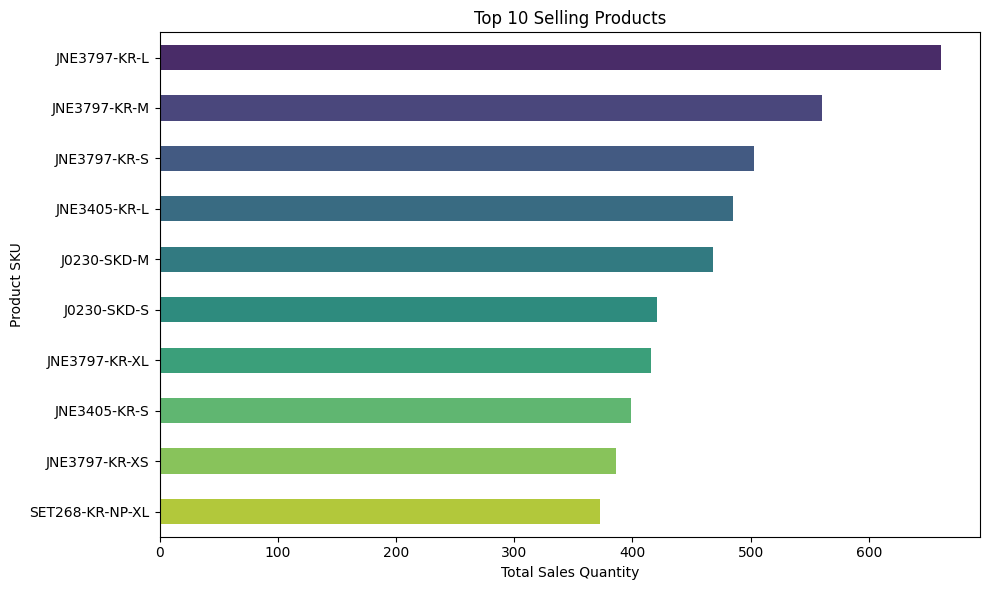

In [ ]:
#visualization of top 10 selling products

# find top-selling products
top_selling_products = df.groupby('SKU')['Qty'].sum().reset_index()

# Sort the products by total sales amount in descending order
top_selling_products = top_selling_products.sort_values(by='Qty', ascending=False)

# Select the top 10 selling products
top_10_selling = top_selling_products.head(10)

# Plot the data using Seaborn for a better visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_selling, x='Qty', y='SKU', palette='viridis',width = 0.5)

# Adding labels and title
plt.title('Top 10 Selling Products')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Product SKU')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Top selling Category

df.groupby('Category')['Qty'].sum().sort_values(ascending=False).head(10)

<ipython-input-18-c12255084ff8>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Category')['Qty'].sum().sort_values(ascending=False).head(10)


,Qty
Category,
Set,45275
kurta,45034
Western Dress,13942
Top,9900
Ethnic Dress,1052
Blouse,864
Bottom,398
Saree,152
Dupatta,3


<ipython-input-19-e29d21549eb7>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sales_qty = df.groupby('Category')['Qty'].sum().reset_index()
<ipython-input-19-e29d21549eb7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales_qty_sorted, x='Qty', y='Category', palette='viridis',width = 0.5)


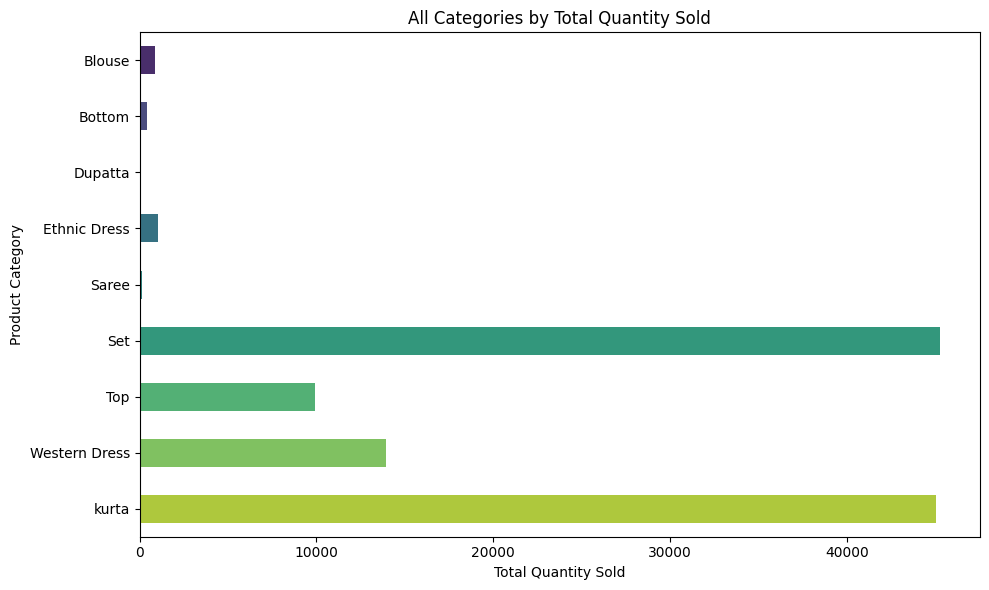

In [ ]:
#visualization of top selling category

# find total quantity sold per category
category_sales_qty = df.groupby('Category')['Qty'].sum().reset_index()

# Sort the categories by total quantity in descending order
category_sales_qty_sorted = category_sales_qty.sort_values(by='Qty', ascending=False)

# Plot the data using Seaborn for a better visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales_qty_sorted, x='Qty', y='Category', palette='viridis',width = 0.5)

# Adding labels and title
plt.title('All Categories by Total Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Average Order Value

round(df['Amount'].mean(),2)

556.63

**Peak Sales Period**

In [ ]:
# making new column w.r.t. day name from date column
df['DayName'] = df['Date'].dt.day_name()

In [ ]:
# Peak Sales - Day Wise

df.groupby('DayName')['Amount'].sum().sort_values(ascending=False)

,Amount
DayName,
Sunday,11009530.00
Tuesday,10487472.00
Wednesday,10311378.00
Monday,10301063.00
Saturday,10297316.62
Friday,9859181.00
Thursday,9489732.00


<ipython-input-23-18fb1117d837>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daywise_sales, x='DayName', y='Amount', palette='viridis', width = 0.5)


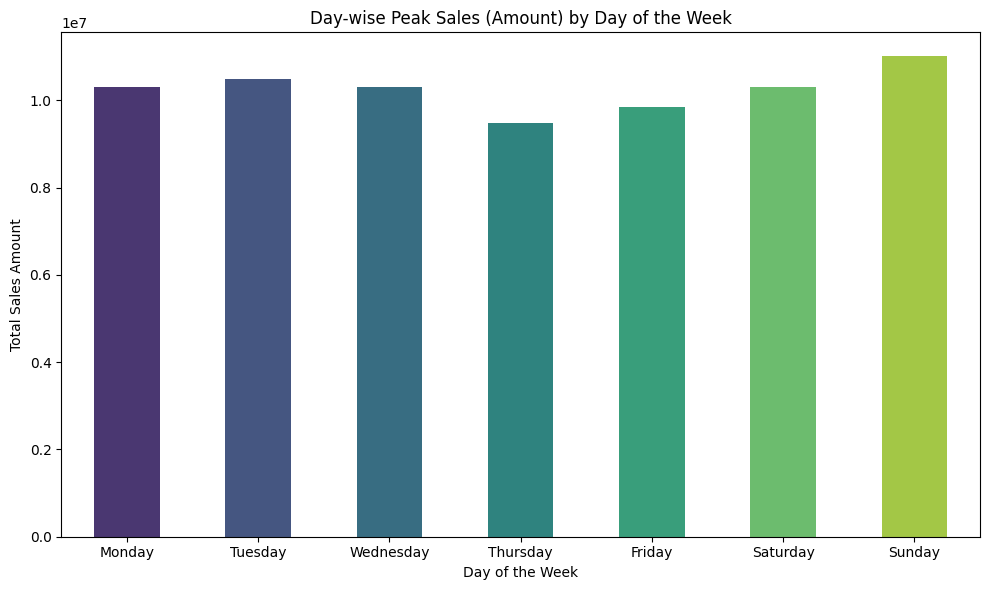

In [ ]:
#visualization of peak day sales by day wise

# sum the Amount for total sales per day
daywise_sales = df.groupby('DayName')['Amount'].sum().reset_index()

# the correct order of days from Monday to Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the 'DayName' column to follow the correct order
daywise_sales['DayName'] = pd.Categorical(daywise_sales['DayName'], categories=day_order, ordered=True)
daywise_sales = daywise_sales.sort_values('DayName')

# Plot the data using Seaborn for a better visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=daywise_sales, x='DayName', y='Amount', palette='viridis', width = 0.5)

# Adding labels and title
plt.title('Day-wise Peak Sales (Amount) by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Amount')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Peak Sales - Date Wise

df.groupby(df['Date'].dt.to_period('D'))['Amount'].sum().nlargest(5)

,Amount
Date,
2022-05-04,1107457.0
2022-05-03,1085967.0
2022-05-02,1074014.0
2022-04-14,1023687.0
2022-04-20,1017403.0


In [ ]:
# Peak Sales - Weekly Wise

df.groupby(df['Date'].dt.to_period('W'))['Amount'].sum().nlargest(3)

,Amount
Date,
2022-05-02/2022-05-08,6580920.00
2022-04-18/2022-04-24,6482031.00
2022-04-11/2022-04-17,6240709.05


In [ ]:
# Peak Sales - Monthly Wise

df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum().nlargest(2)

,Amount
Date,
2022-04,26272649.62
2022-05,23975445.00


# Customer Insights

In [ ]:
# Top Performing Location city-wise

df.groupby(['ship-city'])['Amount'].sum().sort_values(ascending=False).head(10)

,Amount
ship-city,
BENGALURU,6349713.00
HYDERABAD,4499883.57
MUMBAI,3400494.00
NEW DELHI,3331168.48
CHENNAI,2823610.00
PUNE,2153145.00
KOLKATA,1305113.00
GURUGRAM,1135033.00
THANE,918782.00


<ipython-input-28-f07d242f100c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_cities, x='Amount', y='ship-city', palette='viridis',width=0.5)


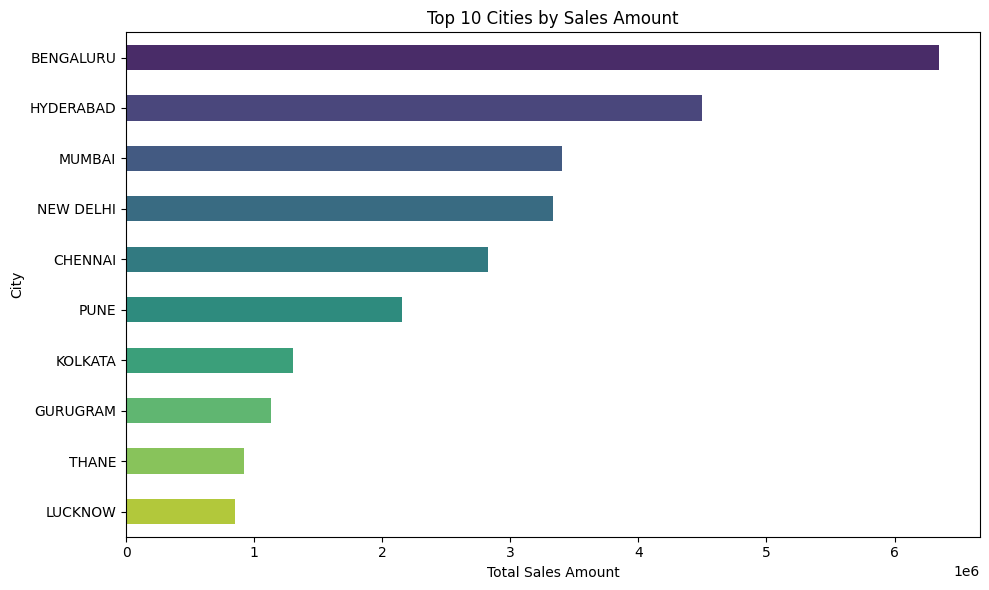

In [ ]:
# visualization for top 10 city by Sales

# sum the 'Amount' for each city
city_sales = df.groupby('ship-city')['Amount'].sum().reset_index()

# Sort the cities by total sales (Amount) in descending order
city_sales_sorted = city_sales.sort_values(by='Amount', ascending=False)

# Select the top 10 cities
top_10_cities = city_sales_sorted.head(10)

# Plot the data using Seaborn (bar chart for top 10 cities)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_cities, x='Amount', y='ship-city', palette='viridis',width=0.5)

# Adding labels and title
plt.title('Top 10 Cities by Sales Amount')
plt.xlabel('Total Sales Amount')
plt.ylabel('City')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Top Performing Location state-wise

df.groupby(['ship-state'])['Amount'].sum().sort_values(ascending=False).head(10)

,Amount
ship-state,
MAHARASHTRA,12233176.00
KARNATAKA,9648329.00
TELANGANA,6293653.57
UTTAR PRADESH,6184515.00
TAMIL NADU,5958817.00
DELHI,3907340.48
KERALA,3378602.00
WEST BENGAL,3208055.00
ANDHRA PRADESH,2886567.00


<ipython-input-30-aa2775a0eff5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_states, x='Amount', y='ship-state', palette='viridis',width=0.5)


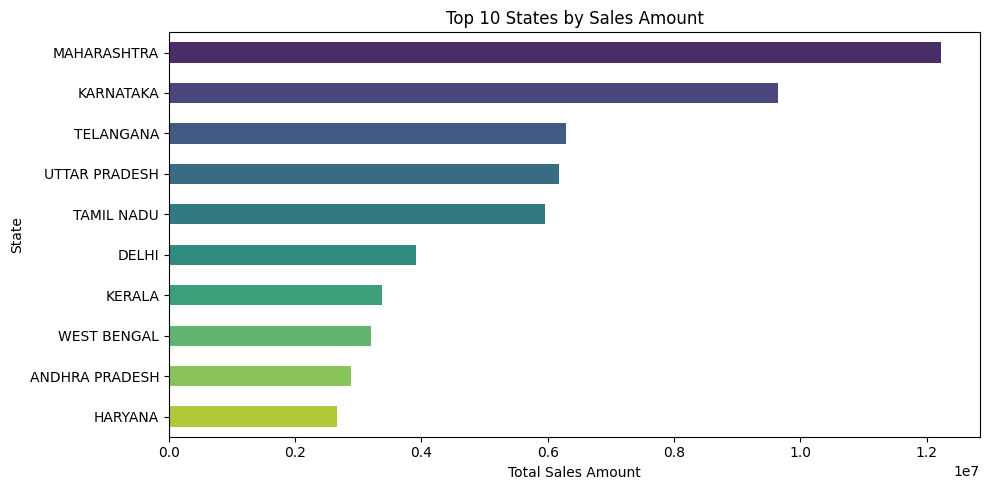

In [ ]:
# visualization for top 10 states by Sales

# sum the 'Amount' for each state
state_sales = df.groupby('ship-state')['Amount'].sum().reset_index()

# Sort the states by total sales (Amount) in descending order
state_sales_sorted = state_sales.sort_values(by='Amount', ascending=False)

# Select the top 10 states
top_10_states = state_sales_sorted.head(10)

# Plot the data using Seaborn (bar chart for top 10 states)
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_states, x='Amount', y='ship-state', palette='viridis',width=0.5)

# Adding labels and title
plt.title('Top 10 States by Sales Amount')
plt.xlabel('Total Sales Amount')
plt.ylabel('State')
plt.tight_layout()

# Show the plot
plt.show()

Trend in Order Cancellation

In [ ]:
df['Status'].value_counts()

,count
Status,
Shipped,77748
Shipped - Delivered to Buyer,28764
Cancelled,18331
Shipped - Returned to Seller,1950
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


In [ ]:
# Total Orders

Total_Orders = df['Status'].value_counts().sum()
print(Total_Orders)

128910


In [ ]:
df['Status'].value_counts()

,count
Status,
Shipped,77748
Shipped - Delivered to Buyer,28764
Cancelled,18331
Shipped - Returned to Seller,1950
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


In [ ]:
# List of statuses that represent cancelled orders
cancellation_statuses = [
    'Cancelled',
    'Shipped - Returned to Seller',
    'Shipped - Returning to Seller',
    'Shipped - Rejected by Buyer'
]

# Filter the rows where the order is cancelled
cancellations = df[df['Status'].isin(cancellation_statuses)]


In [ ]:
# Get the total number of cancelled orders
total_cancelled_orders = cancellations.shape[0]

# Display the total cancelled orders
print(total_cancelled_orders)


20437


In [ ]:
# Cancelled Orders Rate

Cancelled_Orders_Percentage = round((total_cancelled_orders / Total_Orders) * 100,2)
print(Cancelled_Orders_Percentage, "%")

15.85 %


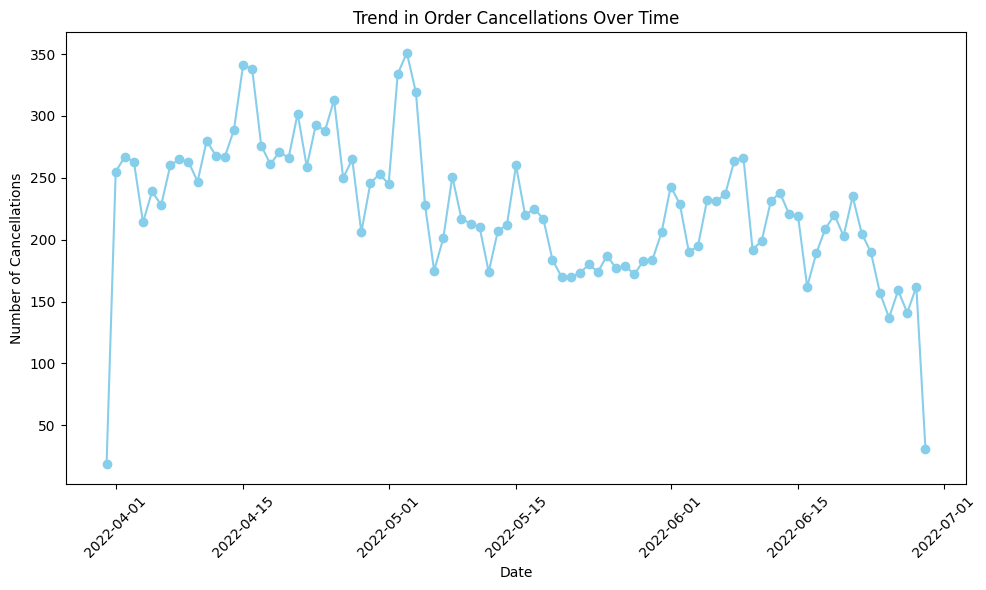

In [ ]:
# Group by 'Date' to get cancellations over time (daily trend)
cancellations_by_day = cancellations.groupby(cancellations['Date'].dt.date).size()

# Plotting the trend in cancellations over time
plt.figure(figsize=(10, 6))
cancellations_by_day.plot(kind='line', color='skyblue', marker='o')

# Adding labels and title
plt.title('Trend in Order Cancellations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#checking for outliers as shown in chart in end there is a spike so

# Calculate the IQR to identify outliers
Q1 = cancellations_by_day.quantile(0.25)
Q3 = cancellations_by_day.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = cancellations_by_day[(cancellations_by_day < lower_bound) | (cancellations_by_day > upper_bound)]

# Display the outliers
print("Outliers detected:", outliers)


Outliers detected: Date
2022-03-31    19
2022-06-29    31
dtype: int64


B2B & B2C Comparision

In [ ]:
# Order Count by b2b and b2c

df['B2B'].value_counts()

,count
B2B,
False,128039
True,871


In [ ]:
# making different dataframes for comparision
b2b_orders = df[df['B2B'] == True]
b2c_orders = df[df['B2B'] == False]

# Total Orders (B2B vs B2C)
total_b2b_orders = b2b_orders.shape[0]
total_b2c_orders = b2c_orders.shape[0]

# Total Revenue (Amount) (B2B vs B2C)
total_b2b_revenue = b2b_orders['Amount'].sum()
total_b2c_revenue = b2c_orders['Amount'].sum()

# Print the results
print(f"Total B2B Orders: {total_b2b_orders}")
print(f"Total B2C Orders: {total_b2c_orders}")
print(f"Total B2B Revenue: {total_b2b_revenue}")
print(f"Total B2C Revenue: {total_b2c_revenue}")

Total B2B Orders: 871
Total B2C Orders: 128039
Total B2B Revenue: 559945.0
Total B2C Revenue: 71195727.62


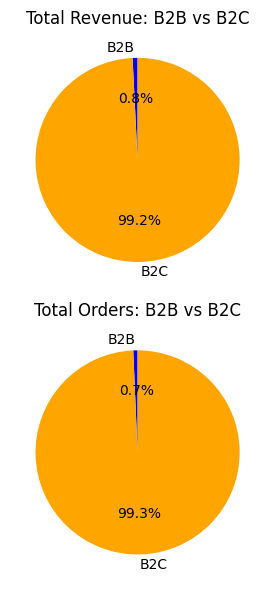

In [ ]:
#visualization in pie chart for comparision

# Data for comparison
categories = ['B2B', 'B2C']
total_orders = [total_b2b_orders, total_b2c_orders]
total_revenue = [total_b2b_revenue, total_b2c_revenue]

# Plotting the Total Revenue comparison (Pie Chart)
plt.figure(figsize=(6, 6))

# Pie Chart for Total Revenue
plt.subplot(2, 1, 1)
plt.pie(total_revenue, labels=categories, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Total Revenue: B2B vs B2C')

# Pie Chart for Total Orders
plt.subplot(2, 1, 2)
plt.pie(total_orders, labels=categories, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Total Orders: B2B vs B2C')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Logistics & Fulfillment

*Average shipping time can not be calculated as we have only order date in columns

In [ ]:
# Orders fulfilled by amazon vs merchant

df['Fulfilment'].value_counts()

,count
Fulfilment,
Amazon,89653
Merchant,39257


In [ ]:
# percentage order fulfilled by Amazon

Order_by_Amazon = round((df['Fulfilment'] == "Amazon").sum() / df['Fulfilment'].count() * 100,2)
print(Order_by_Amazon, "%")

69.55 %


In [ ]:
# percentage order fulfilled by Merchant

Order_by_Merchant = round((df['Fulfilment'] == "Merchant").sum() / df['Fulfilment'].count() * 100,2)
print(Order_by_Merchant, "%")

30.45 %


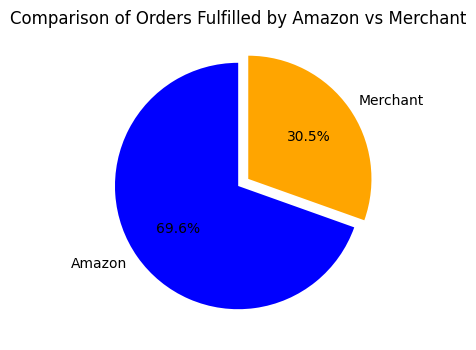

In [ ]:
# visualization in pie chart for better comparision

# Values for pie chart
labels = ['Amazon', 'Merchant']
sizes = [Order_by_Amazon, Order_by_Merchant]
colors = ['blue', 'orange']
explode = (0, 0.1)  # Explode Merchant slice

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Comparison of Orders Fulfilled by Amazon vs Merchant')
plt.show()

# Product Management

In [ ]:
# Popular Product Categories

df.groupby('Category')['Order ID'].count().sort_values(ascending=False)

<ipython-input-46-769e3077a765>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Category')['Order ID'].count().sort_values(ascending=False)


,Order ID
Category,
Set,50260
kurta,49846
Western Dress,15494
Top,10619
Ethnic Dress,1158
Blouse,926
Bottom,440
Saree,164
Dupatta,3


<ipython-input-47-0a8cd1e3d952>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_order_counts = df.groupby('Category')['Order ID'].count().reset_index(name='Order Count')
<ipython-input-47-0a8cd1e3d952>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Order Count', data=category_order_counts, palette='Blues_d', width = 0.5)


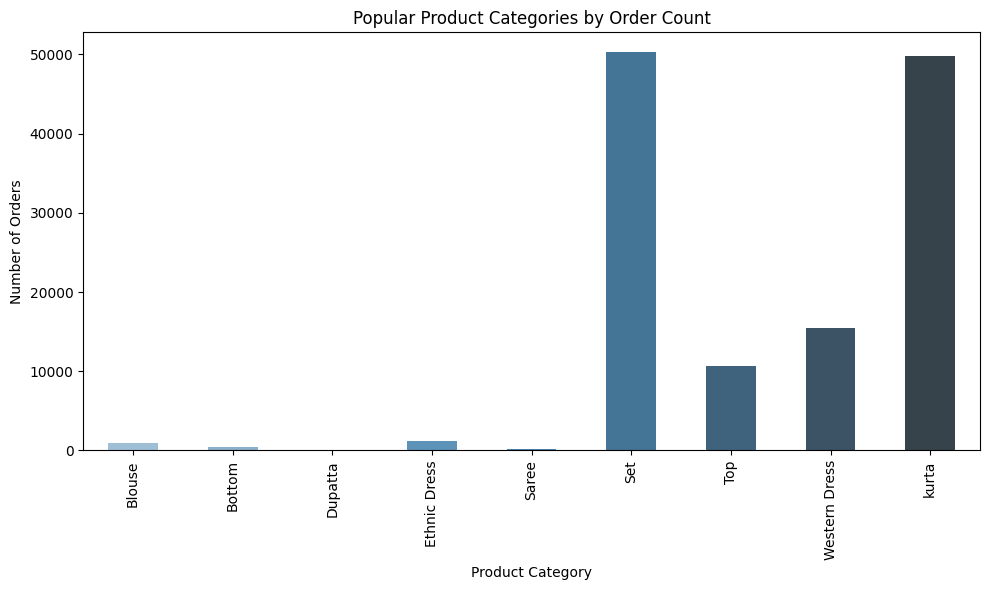

In [ ]:
# visualization of popular product category in bar chart

# count the number of orders in each category
category_order_counts = df.groupby('Category')['Order ID'].count().reset_index(name='Order Count')

# Visualize the popular product categories (order count) with Seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Order Count', data=category_order_counts, palette='Blues_d', width = 0.5)
plt.title('Popular Product Categories by Order Count')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)  # Rotate category labels for better visibility
plt.tight_layout()
plt.show()

In [ ]:
# Average Quantity Ordered

df.groupby('Category')['Qty'].mean().sort_values(ascending=False)

<ipython-input-48-3ce9569be081>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Category')['Qty'].mean().sort_values(ascending=False)


,Qty
Category,
Dupatta,1.000000
Blouse,0.933045
Top,0.932291
Saree,0.926829
Ethnic Dress,0.908463
Bottom,0.904545
kurta,0.903463
Set,0.900816
Western Dress,0.899832


<ipython-input-49-d7206d78faea>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_avg_quantity = df.groupby('Category')['Qty'].mean().reset_index(name='Avg Quantity Ordered')
<ipython-input-49-d7206d78faea>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Avg Quantity Ordered', data=category_avg_quantity, palette='Greens_d', width = 0.5)


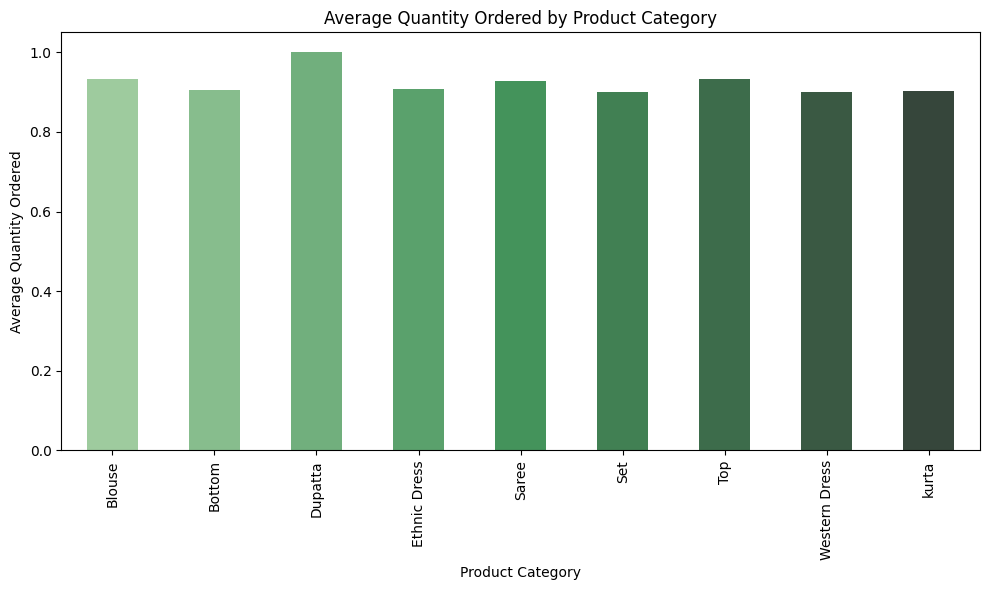

In [ ]:
# visualization of average quantity ordered for each category

# Calculate the average quantity ordered for each category
category_avg_quantity = df.groupby('Category')['Qty'].mean().reset_index(name='Avg Quantity Ordered')

# Visualize the average quantity ordered per category with Seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Avg Quantity Ordered', data=category_avg_quantity, palette='Greens_d', width = 0.5)
plt.title('Average Quantity Ordered by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Quantity Ordered')
plt.xticks(rotation=90)  # Rotate category labels for better visibility
plt.tight_layout()
plt.show()

# Customer Satisfaction & Return

In [ ]:
# checking status for understanding return orders and cancellation orders

df['Status'].value_counts()

,count
Status,
Shipped,77748
Shipped - Delivered to Buyer,28764
Cancelled,18331
Shipped - Returned to Seller,1950
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


**Return Section**

In [ ]:
# return status
return_statuses = [
    'Cancelled',
    'Shipped - Returned to Seller',
    'Shipped - Returning to Seller',
    'Shipped - Rejected by Buyer',
    'Shipped - Damaged'
]

# dataframe for returns
returns = df[df['Status'].isin(return_statuses)]

<ipython-input-52-1367749dbd6a>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  returned_by_category = returns.groupby('Category')['Order ID'].count().reset_index(name='Returned Orders')
<ipython-input-52-1367749dbd6a>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_orders_by_category = df.groupby('Category')['Order ID'].count().reset_index(name='Total Orders')
<ipython-input-52-1367749dbd6a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category

Return Rate Analysis:
        Category  Total Orders  Returned Orders  Return Rate
0         Blouse           926              128    13.822894
1         Bottom           440               66    15.000000
2        Dupatta             3                0     0.000000
3   Ethnic Dress          1158              162    13.989637
4          Saree           164               22    13.414634
5            Set         50260             8179    16.273378
6            Top         10619             1410    13.278086
7  Western Dress         15494             2469    15.935201
8          kurta         49846             8002    16.053445


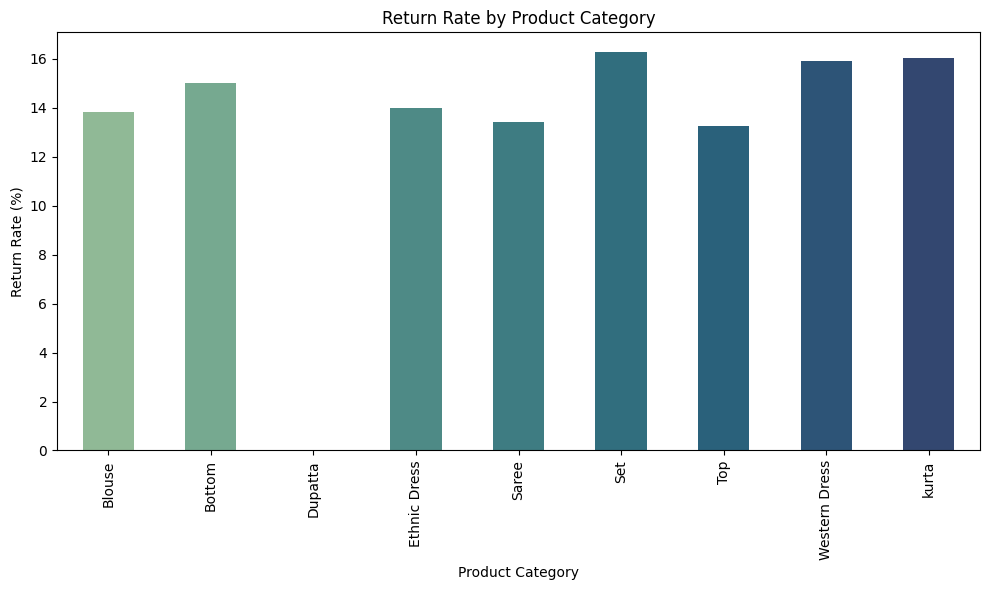

In [ ]:
# printing and visualizing return altogether

# Calculate the number of returns per category
returned_by_category = returns.groupby('Category')['Order ID'].count().reset_index(name='Returned Orders')

# Calculate the total number of orders per category
total_orders_by_category = df.groupby('Category')['Order ID'].count().reset_index(name='Total Orders')

# Merge the return data with total orders to calculate the return rate
category_analysis = pd.merge(total_orders_by_category, returned_by_category, on='Category', how='left')

# Calculate the return rate (as a percentage)
category_analysis['Return Rate'] = (category_analysis['Returned Orders'] / category_analysis['Total Orders']) * 100

# Display the result for better understanding
print("Return Rate Analysis:")
print(category_analysis)

# Step 9: Visualize the return rates with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Return Rate', data=category_analysis, palette='crest',width = 0.5)
plt.title('Return Rate by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Top 10 Products with Highest Returned Quantity:
                  SKU  Returned Quantity
4548     JNE3797-KR-L               39.0
4550     JNE3797-KR-S               37.0
1346      J0230-SKD-M               36.0
2746     JNE3405-KR-L               35.0
6304   SET268-KR-NP-S               32.0
6305  SET268-KR-NP-XL               29.0
4552    JNE3797-KR-XS               27.0
2900   JNE3440-KR-N-M               27.0
2488     JNE3291-KR-L               27.0
6614   SET324-KR-NP-M               26.0


<ipython-input-53-44ceda0f54a4>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SKU', y='Returned Quantity', data=top_10_returned_products, palette='crest',width = 0.5)


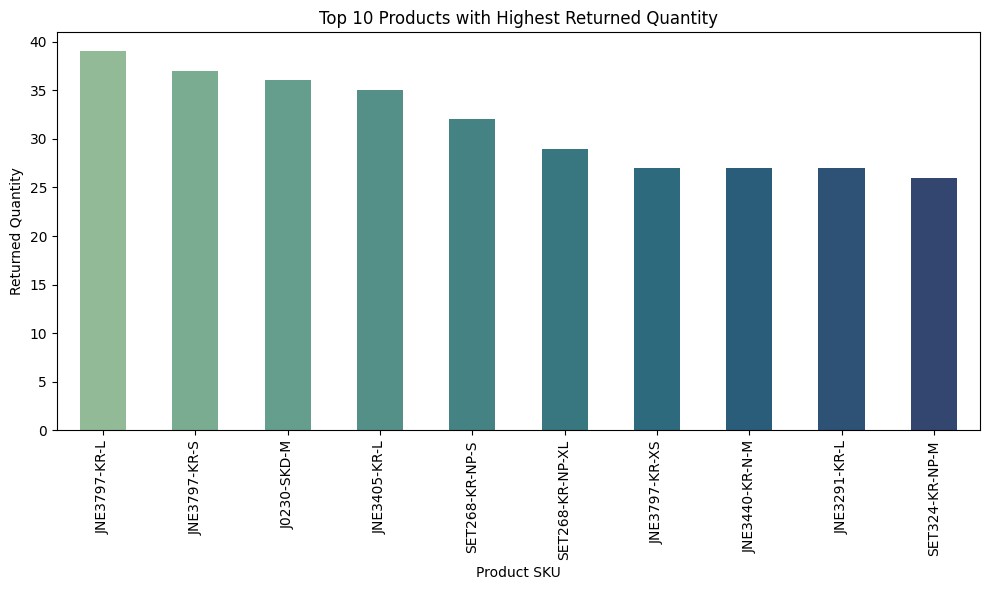

In [ ]:
# printing and visualizing return altogether (top 10 return products)

# total quantity of returns per product
returned_by_product = returns.groupby('SKU')['Qty'].sum().reset_index(name='Returned Quantity')

# Calculate the total number of orders per category
total_orders_by_products = df.groupby('SKU')['Order ID'].count().reset_index(name='Total Orders')

# Merge the return data with total orders to calculate the returned quantities
product_analysis = pd.merge(total_orders_by_products, returned_by_product, on='SKU', how='left')


# Sort products by highest returned quantity and select top 10
top_10_returned_products = product_analysis.sort_values(by='Returned Quantity', ascending=False).head(10)

# Display the top 10 products with the highest returned quantity
print("Top 10 Products with Highest Returned Quantity:")
print(top_10_returned_products[['SKU', 'Returned Quantity']])

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='SKU', y='Returned Quantity', data=top_10_returned_products, palette='crest',width = 0.5)
plt.title('Top 10 Products with Highest Returned Quantity')
plt.xlabel('Product SKU')
plt.ylabel('Returned Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Cancellation Section**

<ipython-input-54-23959d03b829>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancelled_by_category = cancellations.groupby('Category')['Order ID'].count().reset_index(name='Cancelled Orders')
<ipython-input-54-23959d03b829>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_orders_by_category = df.groupby('Category')['Order ID'].count().reset_index(name='Total Orders')
<ipython-input-54-23959d03b829>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='

Cancellation Rate Analysis:
        Category  Total Orders  Cancelled Orders  Cancellation Rate
0         Blouse           926               128          13.822894
1         Bottom           440                66          15.000000
2        Dupatta             3                 0           0.000000
3   Ethnic Dress          1158               162          13.989637
4          Saree           164                22          13.414634
5            Set         50260              8179          16.273378
6            Top         10619              1410          13.278086
7  Western Dress         15494              2468          15.928747
8          kurta         49846              8002          16.053445


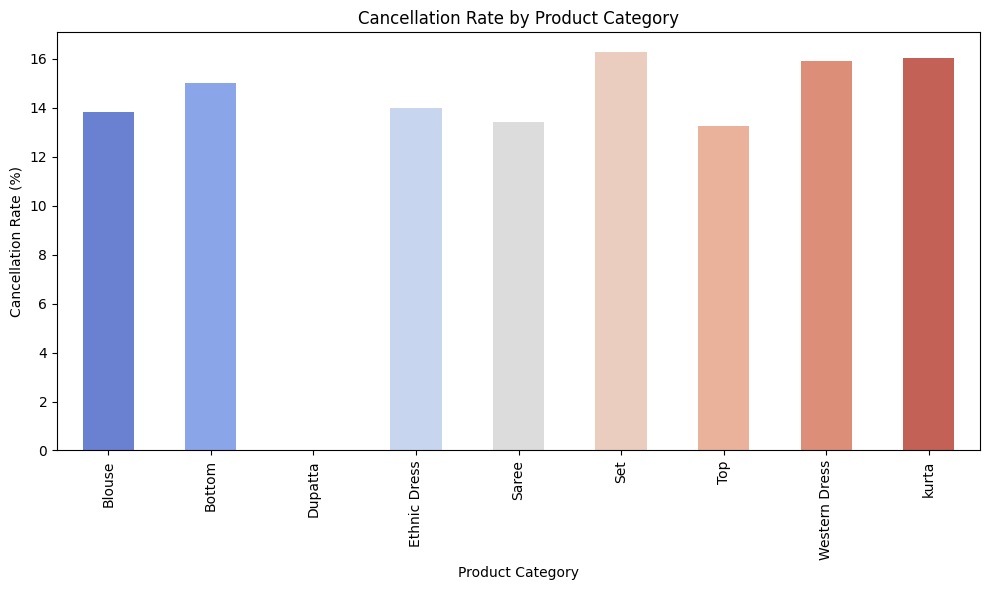

In [ ]:
# cancellations df is already defined earlier so using that

# Calculate the number of cancellations per category
cancelled_by_category = cancellations.groupby('Category')['Order ID'].count().reset_index(name='Cancelled Orders')

# Calculate the total number of orders per category
total_orders_by_category = df.groupby('Category')['Order ID'].count().reset_index(name='Total Orders')

# Merge the cancellation data with total orders to calculate the cancellation rate
category_analysis = pd.merge(total_orders_by_category, cancelled_by_category, on='Category', how='left')

# Calculate the cancellation rate (as a percentage)
category_analysis['Cancellation Rate'] = (category_analysis['Cancelled Orders'] / category_analysis['Total Orders']) * 100

# Display the result for better understanding
print("Cancellation Rate Analysis:")
print(category_analysis)

# Visualize the cancellation rates with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Cancellation Rate', data=category_analysis, palette='coolwarm',width = 0.5)
plt.title('Cancellation Rate by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Top 10 Products with Highest Cancelled Quantity:
                  SKU  Total Quantity  Cancelled Quantity
4548     JNE3797-KR-L             661                39.0
4550     JNE3797-KR-S             503                37.0
1346      J0230-SKD-M             468                36.0
2746     JNE3405-KR-L             485                35.0
6304   SET268-KR-NP-S             351                32.0
6305  SET268-KR-NP-XL             373                29.0
2900   JNE3440-KR-N-M             185                27.0
4552    JNE3797-KR-XS             386                27.0
2488     JNE3291-KR-L             179                27.0
6614   SET324-KR-NP-M             269                26.0


<ipython-input-55-c292cab01a0e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SKU', y='Cancelled Quantity', data=top_10_cancelled_products, palette='coolwarm',width=0.5)


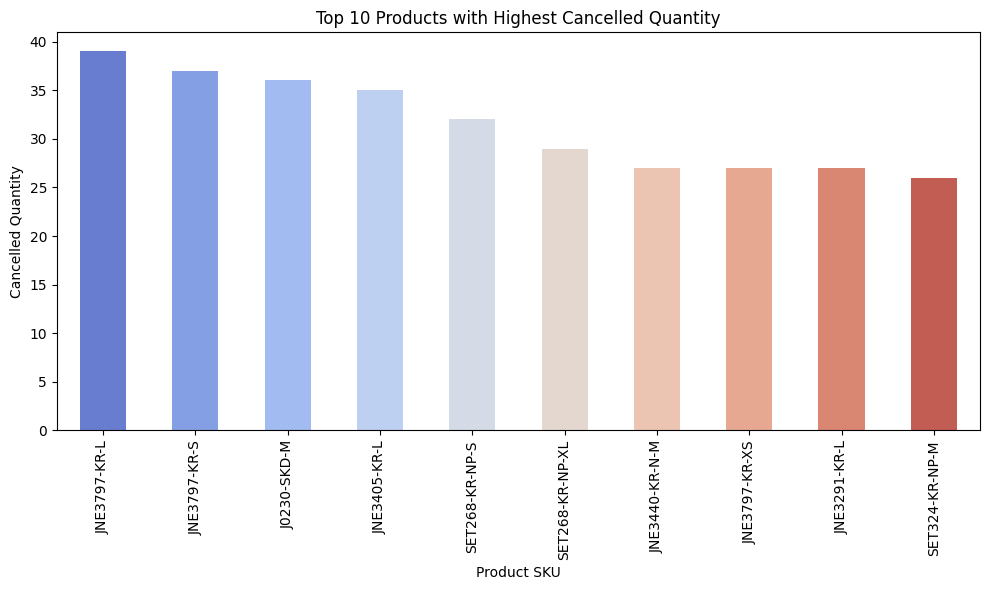

In [ ]:
# product wise cancellation calculation

# Calculate the total quantity of cancellations per product
cancelled_by_product = cancellations.groupby('SKU')['Qty'].sum().reset_index(name='Cancelled Quantity')

# Calculate the total quantity of orders per product (for comparison)
total_orders_by_product = df.groupby('SKU')['Qty'].sum().reset_index(name='Total Quantity')

# Merge the cancellation data with total orders to calculate the cancelled quantities
product_analysis = pd.merge(total_orders_by_product, cancelled_by_product, on='SKU', how='left')

# Sort products by highest cancelled quantity and select top 10
top_10_cancelled_products = product_analysis.sort_values(by='Cancelled Quantity', ascending=False).head(10)

# Display the top 10 products with the highest cancelled quantity
print("Top 10 Products with Highest Cancelled Quantity:")
print(top_10_cancelled_products)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='SKU', y='Cancelled Quantity', data=top_10_cancelled_products, palette='coolwarm',width=0.5)
plt.title('Top 10 Products with Highest Cancelled Quantity')
plt.xlabel('Product SKU')
plt.ylabel('Cancelled Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Additional EDA

In [ ]:
df['Status'].value_counts()

,count
Status,
Shipped,77748
Shipped - Delivered to Buyer,28764
Cancelled,18331
Shipped - Returned to Seller,1950
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


  Year_Month  Return Rate (%)
0    2022-03         3.205128
1    2022-04         6.846154
2    2022-05         6.523169
3    2022-06         6.698579


<ipython-input-57-bab6e0bc806e>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year_Month', y='Return Rate (%)', data=monthly_analysis, palette='Blues_d',width = 0.5)


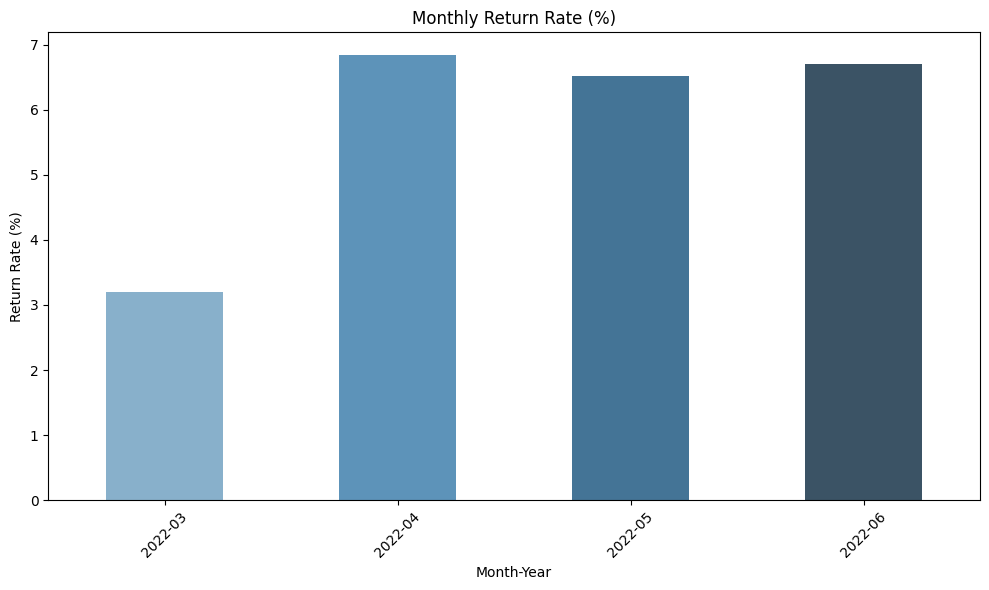

In [ ]:
# Step 1: Convert the 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Extract Month and Year from the 'Date' column
df['Year_Month'] = df['Date'].dt.to_period('M')  # Creates a period object like '2024-01', '2024-02', etc.

# Step 3: Define return statuses
return_statuses = [
    'Cancelled',
    'Shipped - Returned to Seller',
    'Shipped - Returning to Seller',
    'Shipped - Rejected by Buyer',
    'Shipped - Damaged'
]

# Step 4: Filter the data for returns
returns = df[df['Status'].isin(return_statuses)]

# Step 5: Calculate the total quantity of returns per month
returns_monthly = returns.groupby('Year_Month')['Qty'].sum().reset_index(name='Returned Quantity')

# Step 6: Calculate the total quantity of orders per month
total_orders_monthly = df.groupby('Year_Month')['Qty'].sum().reset_index(name='Total Quantity')

# Step 7: Merge the data to calculate the return rate per month
monthly_analysis = pd.merge(total_orders_monthly, returns_monthly, on='Year_Month', how='left')

# Step 8: Calculate the return rate for each month
monthly_analysis['Return Rate (%)'] = (monthly_analysis['Returned Quantity'] / monthly_analysis['Total Quantity']) * 100

# Step 9: Fill NaN values with 0 (in case there were no returns in a month)
monthly_analysis.fillna(0, inplace=True)

# Display the monthly return rate
print(monthly_analysis[['Year_Month', 'Return Rate (%)']])

# Visualization: Monthly Return Rate (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Year_Month', y='Return Rate (%)', data=monthly_analysis, palette='Blues_d',width = 0.5)
plt.title('Monthly Return Rate (%)')
plt.xlabel('Month-Year')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


  Year_Month  Total Revenue
0    2022-03       95355.00
1    2022-04    26272649.62
2    2022-05    23975445.00
3    2022-06    21412223.00


<ipython-input-58-e32e2d2dae4b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year_Month', y='Total Revenue', data=monthly_revenue, palette='viridis',width=0.5)


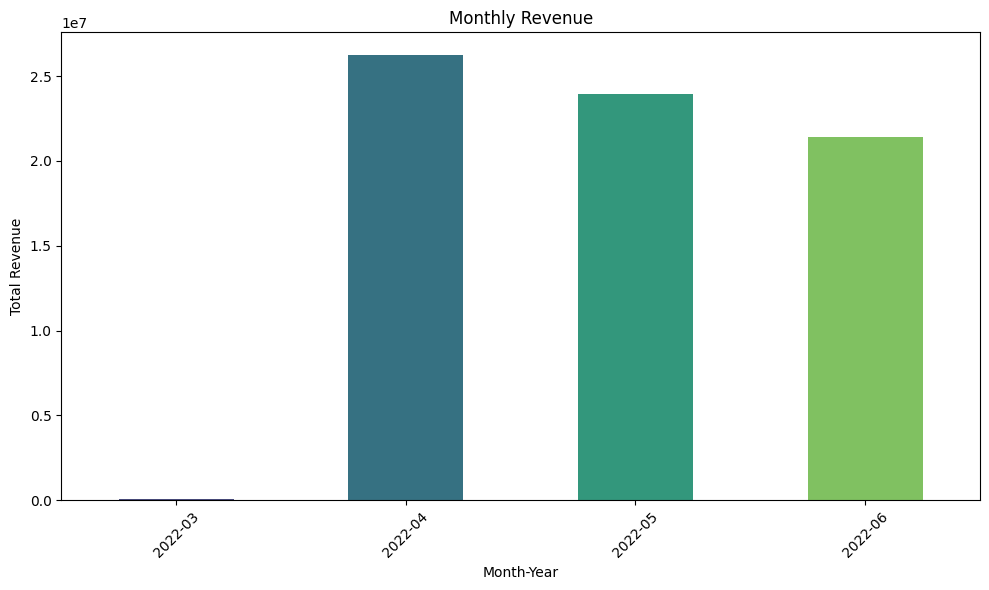

In [ ]:
# Step 1: Convert the 'Date' column to datetime format if not already
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Extract Month and Year from the 'Date' column
df['Year_Month'] = df['Date'].dt.to_period('M')  # Creates a period object like '2024-01', '2024-02', etc.

# Step 3: Calculate the total revenue per month
monthly_revenue = df.groupby('Year_Month')['Amount'].sum().reset_index(name='Total Revenue')

# Display the monthly revenue data
print(monthly_revenue)

# Visualization: Monthly Revenue (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Year_Month', y='Total Revenue', data=monthly_revenue, palette='viridis',width=0.5)
plt.title('Monthly Revenue')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
filtered_sales = df[(df['Size'] == 'M') & (df['Category'] == 'Set')]

# Calculate the total quantity sold for 'M' size in 'Set' category
total_quantity_sold = filtered_sales['Qty'].sum()

# Print the result
print(f"Total quantity sold from 'M' size in 'Set' category: {total_quantity_sold}")

Total quantity sold from 'M' size in 'Set' category: 8355


In [ ]:
df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)

,Amount
ship-city,
BENGALURU,6349713.00
HYDERABAD,4499883.57
MUMBAI,3400494.00
NEW DELHI,3331168.48
CHENNAI,2823610.00
...,...
BIJAINAGAR AJMER DISTRICT,0.00
Rahatani,0.00
BIHKA,0.00


  Year_Month  Cancellation Rate (%)
0    2022-03               3.205128
1    2022-04               6.846154
2    2022-05               6.523169
3    2022-06               6.695660


<ipython-input-61-826bf9f0f7c6>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year_Month', y='Cancellation Rate (%)', data=monthly_analysis, palette='Reds_d', width=0.5)


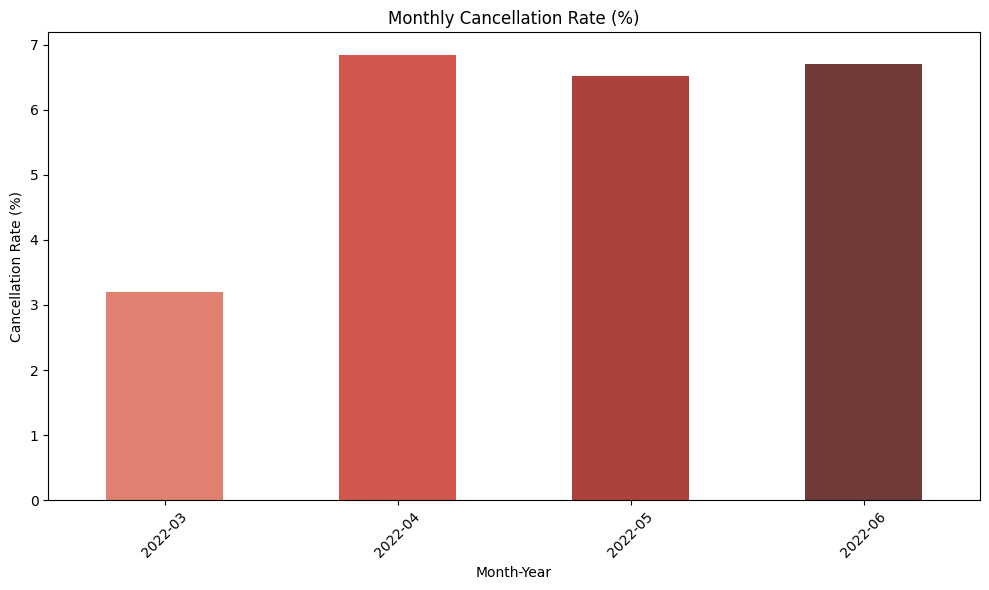

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Convert the 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Extract Month and Year from the 'Date' column
df['Year_Month'] = df['Date'].dt.to_period('M')  # Creates a period object like '2024-01', '2024-02', etc.

# Step 3: Define cancellation statuses
cancellation_statuses = [
    'Cancelled',
    'Shipped - Returned to Seller',
    'Shipped - Returning to Seller',
    'Shipped - Rejected by Buyer'
]

# Step 4: Filter the data for cancellations
cancellations = df[df['Status'].isin(cancellation_statuses)]

# Step 5: Calculate the total quantity of cancellations per month
cancellations_monthly = cancellations.groupby('Year_Month')['Qty'].sum().reset_index(name='Cancelled Quantity')

# Step 6: Calculate the total quantity of orders per month
total_orders_monthly = df.groupby('Year_Month')['Qty'].sum().reset_index(name='Total Quantity')

# Step 7: Merge the data to calculate the cancellation rate per month
monthly_analysis = pd.merge(total_orders_monthly, cancellations_monthly, on='Year_Month', how='left')

# Step 8: Calculate the cancellation rate for each month
monthly_analysis['Cancellation Rate (%)'] = (monthly_analysis['Cancelled Quantity'] / monthly_analysis['Total Quantity']) * 100

# Step 9: Fill NaN values with 0 (in case there were no cancellations in a month)
monthly_analysis.fillna(0, inplace=True)

# Display the monthly cancellation rate
print(monthly_analysis[['Year_Month', 'Cancellation Rate (%)']])

# Visualization: Monthly Cancellation Rate (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Year_Month', y='Cancellation Rate (%)', data=monthly_analysis, palette='Reds_d', width=0.5)
plt.title('Monthly Cancellation Rate (%)')
plt.xlabel('Month-Year')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Conclusion of Analysis

**Financial Performance**

- Revenue declining from past three months.
- Sunday having the highest sales day contributing 15.34% of total sales
- Top 10 selling products sharing 5% of total revenue

**Customer Insights**

- Banglore, Mumbai, Hyderabad are top 3 locations contributing 22% of total revenue
- Cancellation rate is ranging between 11% - 19% every month
- In comparision between B2B & B2C , B2C is the revenue generator

**Logistics & Fulfillment**

- Only 5-10% of total orders are getting delivered
- 18-22% of the total orders are always in shipping mode which delaying in delivering the orders
- Amazon is fulfilling 70% of the orders

**Product Management**

- 'Set' category is the highest revenue generator contributing 50% of total revenue
- 'Dupatta' Category is having highest avg order quantity, that means it is the high demand category
- 'BL017-63BLACK' is the popular product among all highest avg qty order at 8

**Customer Satisfaction & Returns**

- 'Set, Kurta & Western Dress are the top 3 category with return rate of around 1600%
- there are some ordes having return rate of 10000% and products with high return rate are so much.

# Recommendations

- Inventory Optimization -- stock more of popular products cateogries based on data.
- Targeted marketing -- Develop separate strategies for B2B and B2C segments based on purchasing behaviour.
- Logistics Improvement -- Focus on optimizing fulfillment methods and reducing shipping times for better efficiency.
- Customer Experience Enhancement -- Address quality issues with high-return products to improve satisfaction.

# Export

In [ ]:
# downloading cleaned file

from google.colab import files
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>